Feature Engineering

In [14]:
import nltk
import re
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.tag import pos_tag
# Function for lemmatization with POS tagging
def lemmatize_with_pos(tokens):
    tagged_tokens = pos_tag(tokens)
    def get_wordnet_pos(tag):
        if tag.startswith('V'):
            return 'v'  # Verb
        elif tag.startswith('N'):
            return 'n'  # Noun
        elif tag.startswith('J'):
            return 'a'  # Adjective
        elif tag.startswith('R'):
            return 'r'  # Adverb
        else:
            return 'n'  # Default to noun
    return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in tagged_tokens]

# Preprocessing function
def cleanResume(text):
    """
    Cleans and preprocesses resume text by removing unnecessary characters,
    tokenizing, and applying lemmatization with POS tagging.
    """
    if not isinstance(text, str):  # Ensure input is a valid string
        return ""

    # Convert to lowercase
    cleanText = text.lower()

    # Remove URLs
    cleanText = re.sub(r'http\S+\s', ' ', cleanText)

    # Remove retweets and unnecessary markers
    cleanText = re.sub(r'RT|cc', ' ', cleanText)

    # Remove hashtags and mentions
    cleanText = re.sub(r'#\S+\s', ' ', cleanText)
    cleanText = re.sub(r'@\S+', ' ', cleanText)

    # Remove special characters, punctuations, and non-ASCII characters
    cleanText = re.sub(r'[^a-z\s]', '', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)

    # Remove extra whitespaces
    cleanText = re.sub(r'\s+', ' ', cleanText).strip()

    # Tokenize text
    tokens = cleanText.split()

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize with POS tagging
    tokens = lemmatize_with_pos(tokens)

    # Join tokens back into a single string
    return " ".join(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
import pandas as pd # Import the pandas library

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('resumes_dataset.csv') # Load data into a DataFrame named 'df'

# Check the original category distribution
print("Original Category Distribution:")
print(df['Category'].value_counts())

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()

# Perform oversampling
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
df = balanced_df.sample(frac=1).reset_index(drop=True)

# Check the balanced category distribution
print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())

Original Category Distribution:
Category
React JS Developer    24
Workday               21
PeopleSoft            20
SQL Developer         14
Name: count, dtype: int64

Balanced Category Distribution (After Oversampling):
Category
React JS Developer    24
Workday               24
PeopleSoft            24
SQL Developer         24
Name: count, dtype: int64


<ipython-input-15-2f1d2dcad2c7>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


In [16]:
# Replace NaN or non-string values with an empty string
df['Resumes'] = df['Resumes'].fillna("").astype(str)

In [17]:
# Apply the cleanResume function to each entry in the Resumes column
df['Resumes'] = df['Resumes'].apply(lambda x: cleanResume(x))

In [18]:
df['Resumes'][20]

'sql developer name bandi prem sai willing work challenge professional environment exposure new technology tsql area sql server enterprise portal ample scope organizational growth well individual growth year experience microsoft sql server environment thorough knowledge sql server databases expertise script tsql query store procedure user defined function trigger hand experience perform error handle performance tuning stored procedure good experience create use temporary table table variable ctes common table expression use subqueries derive table join simplify complex query involve multiple table expertise create maintain database object like index function view udfs constraint good experience use ranking function date function string function aggregate function good knowledge transaction isolation level concurrency problem good experience building relationship use constraint good knowledge create job automate process use sql server agent good knowledge new feature sql server bca sri 

Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df["LebelEncoding"]=Encoder.fit_transform(df["Category"])
df

,Resumes,Category,LebelEncoding
0,ranga gaganam year su essful experience phase ...,React JS Developer,1
1,chinna subbarayudu dob th march nationality in...,Workday,3
2,murali experience summary year experience work...,PeopleSoft,0
3,vinay kumar v workday functional consultant ex...,Workday,3
4,jyoti verma year experience workday functional...,Workday,3
...,...,...,...
91,name gopi krishna reddy professional summery w...,Workday,3
92,name j sumanth royal professional summary tota...,Workday,3
93,c n c address manyata tech park nagavara banga...,PeopleSoft,0
94,susovan bag seek challenging position field sc...,React JS Developer,1


In [23]:
df.describe()

,LebelEncoding
count,96.000000
mean,1.500000
std,1.123903
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [24]:
df.isnull().sum()

,0
Resumes,0
Category,0
LebelEncoding,0


**Model Building**

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

Train - Test split

In [48]:
x = df['Resumes'].values
y = df['Category'].values

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((72,), (24,))

TF-IDF Vectorization

In [50]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [51]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [52]:
x_train.shape, x_test.shape

((72, 2741), (24, 2741))

In [53]:
print(y_train),print(y_test)

['React JS Developer' 'PeopleSoft' 'SQL Developer' 'React JS Developer'
 'PeopleSoft' 'PeopleSoft' 'SQL Developer' 'React JS Developer'
 'React JS Developer' 'SQL Developer' 'React JS Developer'
 'React JS Developer' 'Workday' 'PeopleSoft' 'Workday' 'SQL Developer'
 'React JS Developer' 'SQL Developer' 'Workday' 'React JS Developer'
 'PeopleSoft' 'Workday' 'Workday' 'SQL Developer' 'PeopleSoft' 'Workday'
 'React JS Developer' 'PeopleSoft' 'SQL Developer' 'Workday' 'Workday'
 'React JS Developer' 'PeopleSoft' 'SQL Developer' 'PeopleSoft'
 'SQL Developer' 'Workday' 'PeopleSoft' 'PeopleSoft' 'PeopleSoft'
 'React JS Developer' 'React JS Developer' 'Workday' 'PeopleSoft'
 'React JS Developer' 'SQL Developer' 'PeopleSoft' 'Workday'
 'React JS Developer' 'React JS Developer' 'React JS Developer'
 'SQL Developer' 'SQL Developer' 'Workday' 'PeopleSoft' 'Workday'
 'Workday' 'Workday' 'React JS Developer' 'Workday' 'PeopleSoft'
 'SQL Developer' 'SQL Developer' 'SQL Developer' 'SQL Developer'
 'SQ

(None, None)

Classification Models

KNN Classifier

In [54]:
model_knn = KNeighborsClassifier(n_neighbors=min(41, len(y_train)))
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.81
Accuracy of  test set    : 0.83
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.83      0.91         6
React JS Developer       1.00      0.50      0.67         6
     SQL Developer       1.00      1.00      1.00         6
           Workday       0.60      1.00      0.75         6

          accuracy                           0.83        24
         macro avg       0.90      0.83      0.83        24
      weighted avg       0.90      0.83      0.83        24




In [55]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.96
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         6
React JS Developer       0.86      1.00      0.92         6
     SQL Developer       1.00      0.83      0.91         6
           Workday       1.00      1.00      1.00         6

          accuracy                           0.96        24
         macro avg       0.96      0.96      0.96        24
      weighted avg       0.96      0.96      0.96        24




In [56]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         6
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         6
           Workday       1.00      1.00      1.00         6

          accuracy                           1.00        24
         macro avg       1.00      1.00      1.00        24
      weighted avg       1.00      1.00      1.00        24




In [57]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         6
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         6
           Workday       1.00      1.00      1.00         6

          accuracy                           1.00        24
         macro avg       1.00      1.00      1.00        24
      weighted avg       1.00      1.00      1.00        24




In [58]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         6
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         6
           Workday       1.00      1.00      1.00         6

          accuracy                           1.00        24
         macro avg       1.00      1.00      1.00        24
      weighted avg       1.00      1.00      1.00        24




In [59]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         6
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         6
           Workday       1.00      1.00      1.00         6

          accuracy                           1.00        24
         macro avg       1.00      1.00      1.00        24
      weighted avg       1.00      1.00      1.00        24




Model Evalution

In [60]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.805556,0.83,0.90,0.83,0.83
1,DecisionTree Classifier,1.000000,0.96,0.96,0.96,0.96
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,1.000000,1.00,1.00,1.00,1.00
4,Logistic Regression,1.000000,1.00,1.00,1.00,1.00
5,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [61]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100, model_NB.score(x_train, y_train)*100]

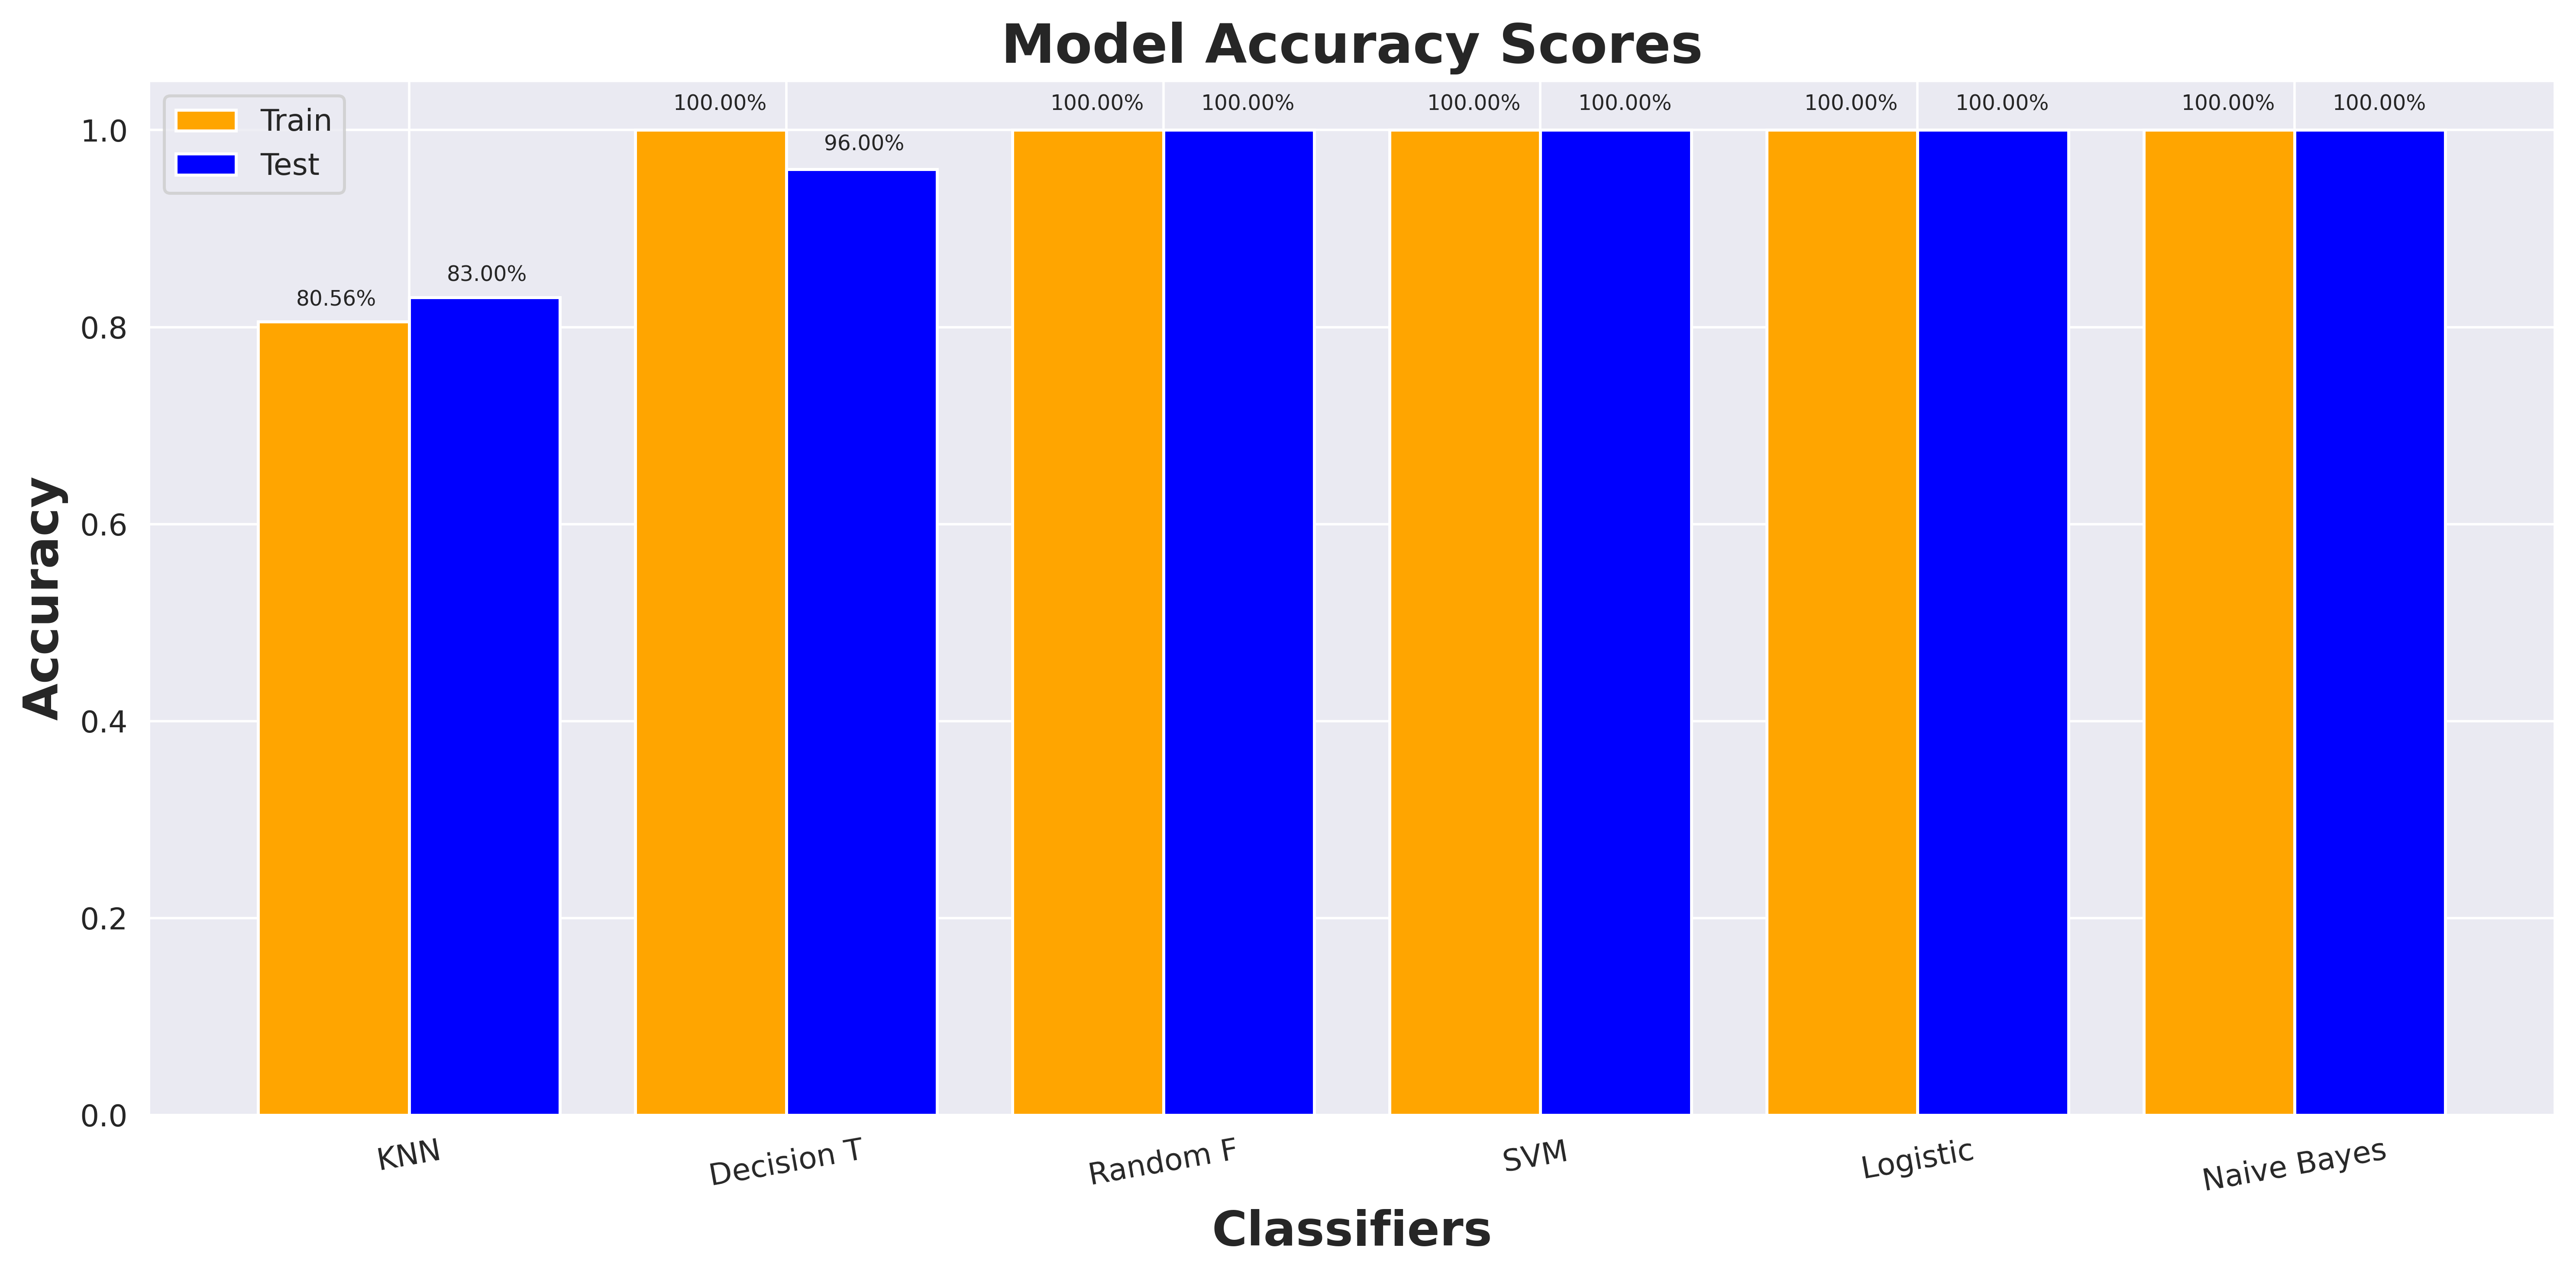

In [64]:
# Train and Test Accuracy plot
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

Model Deployment

Pickle File

In [65]:
import pickle
filename = 'modelRF.pkl'
pickle.dump(model_RF,open(filename,'wb'))

In [66]:
import pickle
filename = 'vector.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))